# Hand Written Digit Prediction - Classification Analysis

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

# Import Library

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import Data

In [33]:

from sklearn.datasets import load_digits

In [34]:
df = load_digits()


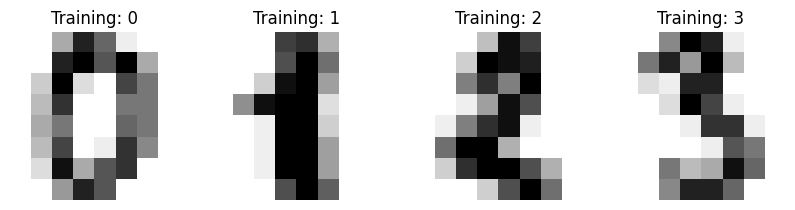

In [35]:

_,  axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Data Preprocessing

In [36]:
df.images.shape

(1797, 8, 8)

In [37]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [24]:
df.images[0].shape

(8, 8)

In [25]:
len(df.images)

1797

In [26]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [27]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [29]:
data[0].shape

(64,)

In [30]:
data.shape

(1797, 64)

# Scaling Image Data

In [38]:
data.min()


0.0

In [39]:
data.max()

16.0

In [40]:
data = data/16

In [41]:
data.min()

0.0

In [42]:
data.max()

1.0

In [43]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)
X_train.shape, X_test.shape, y_train. shape, y_test.shape


((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Predict Test Data

In [46]:
y_pred = rf.predict(X_test)
y_pred

array([7, 0, 3, 8, 9, 9, 4, 2, 3, 7, 2, 1, 0, 9, 0, 2, 6, 2, 9, 1, 8, 2,
       2, 4, 6, 2, 4, 7, 5, 1, 7, 2, 2, 1, 2, 2, 5, 9, 2, 1, 2, 7, 5, 2,
       9, 1, 1, 0, 9, 2, 3, 5, 3, 1, 1, 1, 6, 1, 5, 8, 0, 8, 6, 8, 4, 4,
       6, 4, 8, 8, 2, 3, 6, 9, 8, 5, 8, 3, 0, 7, 4, 9, 6, 1, 1, 5, 2, 4,
       2, 6, 4, 6, 7, 2, 3, 4, 5, 5, 7, 7, 1, 7, 8, 7, 1, 4, 8, 9, 3, 2,
       9, 7, 8, 1, 6, 0, 5, 5, 8, 7, 0, 6, 2, 8, 6, 9, 5, 3, 2, 2, 1, 9,
       0, 9, 8, 9, 9, 5, 4, 0, 0, 2, 1, 7, 0, 8, 7, 8, 5, 9, 4, 4, 0, 7,
       5, 7, 0, 1, 6, 3, 4, 9, 8, 5, 9, 0, 3, 1, 9, 7, 2, 9, 5, 8, 9, 9,
       8, 8, 2, 8, 8, 9, 4, 4, 8, 5, 3, 0, 4, 2, 5, 6, 6, 2, 3, 5, 3, 9,
       4, 6, 0, 9, 1, 7, 6, 5, 3, 7, 1, 3, 7, 6, 2, 8, 3, 9, 7, 6, 3, 7,
       4, 4, 7, 0, 9, 0, 9, 2, 7, 4, 8, 9, 7, 2, 6, 0, 6, 7, 3, 5, 0, 4,
       8, 2, 9, 5, 7, 1, 2, 3, 6, 9, 4, 8, 9, 9, 9, 7, 5, 0, 9, 0, 6, 5,
       1, 0, 6, 9, 9, 1, 2, 3, 2, 6, 0, 1, 4, 1, 6, 0, 0, 9, 4, 2, 7, 6,
       0, 4, 1, 1, 9, 1, 2, 3, 6, 6, 8, 9, 4, 7, 5,

# Model Accuracy

In [47]:
from sklearn.metrics import confusion_matrix , classification_report

In [48]:
confusion_matrix(y_test , y_pred)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 59,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  1, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  1,  0,  1,  1,  1,  0,  0, 45,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 63]])

In [49]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       0.98      1.00      0.99        58
           2       1.00      0.98      0.99        60
           3       0.95      0.97      0.96        40
           4       0.98      0.98      0.98        58
           5       0.94      0.98      0.96        49
           6       1.00      0.96      0.98        52
           7       0.98      0.98      0.98        55
           8       0.98      0.92      0.95        49
           9       0.95      0.95      0.95        66

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# Explaination

Project Overview: The Handwritten Digit Prediction project aims to build a machine learning model that accurately predicts handwritten digits (ranging from 0 to 9). Imagine those old-school handwritten zip codes on envelopes—our goal is to teach a computer to recognize them automatically.

Here’s a concise breakdown of how it’s done:

Data Loading and Exploration:
We start by loading a dataset containing images of handwritten digits. Each image is an 8x8 pixel matrix.
The dataset we commonly use for this task is the MNIST dataset, a benchmark in the field of image classification.
Data Preprocessing:
Before feeding the data to our model, we preprocess it. This involves tasks like scaling pixel values (so they’re in a consistent range) and splitting the data into training and testing sets.
Model Training:
We choose a classification algorithm (such as logistic regression, support vector machines, or neural networks).
The model learns from the training data—adjusting its internal parameters to recognize patterns in the images.
Evaluation:
After training, we evaluate the model’s performance using the testing data.
Metrics like accuracy, confusion matrix, and classification reports help us understand how well our model is doing.
Prediction:
Once trained, our model can predict the digit in new, unseen handwritten images.
